In [1]:
import itertools as it
import numpy as np

In [2]:
from src.capture import Capture, LazyCapture
from src.labels import load_labels
from src.cleaning import select_channel, remove_borders, remove_outside_petri
from src.data_augmentation import h_mirror, v_mirror, rotate_90, rotate_180, rotate_90_label, rotate_180_label, rotate_270_label, rotate_270
from src.debug import print_frame

In [3]:
cap1 = LazyCapture.load('data/pw1_A1_0315_part1.avi')
lab1 = load_labels('data/pw1_A1_0315_part1.txt')

In [4]:
print(cap1.length(), cap1.W(), cap1.H(), cap1.C())
print(len(lab1))

2987 648 686 3
2539


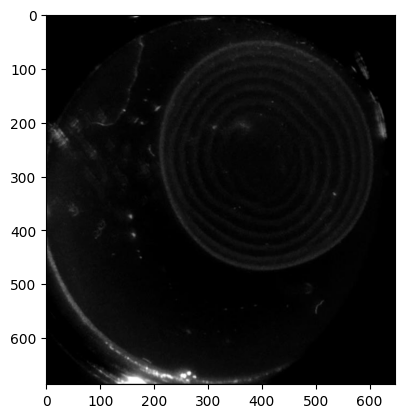

In [5]:
xx = cap1.frame(4, index=False)
print_frame()(0, xx[1], None)

In [6]:
cap1.apply(rotate_180) # shape=(cap1.H(), cap1.W(), cap1.C())

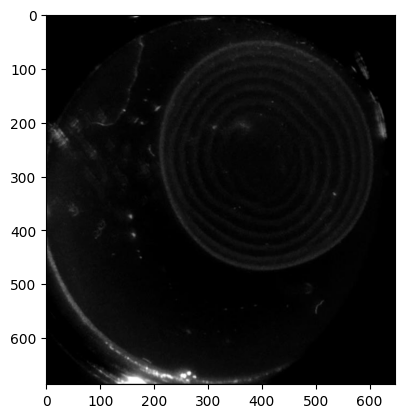

In [7]:
yy = cap1.frame(4, index=False)
print_frame()(0, rotate_180(0, yy[1]), None)

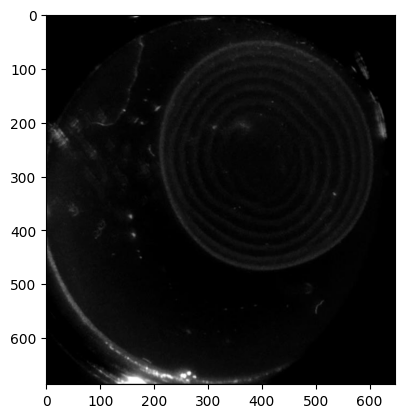

In [18]:
print_frame()(0, rotate_180(0, yy[1]), None)

In [9]:
import numpy as np
np.min(xx[1] == rotate_180(0, yy[1]))

True

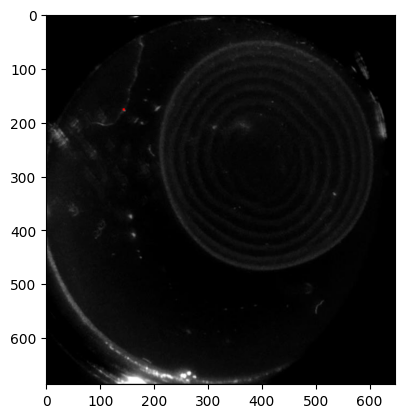

In [5]:
xx = None
frame = cap1.frame(4, index=False)
x = (int(lab1[frame[0]][0]), int(lab1[frame[0]][1]))
xx = frame[1].copy()
print_frame()(frame[0], xx, (x, x))

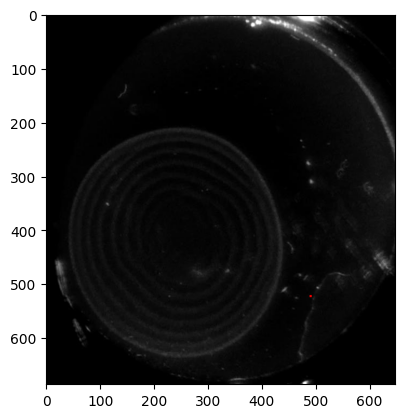

In [9]:
frame = cap1.frame(4, index=False)
x = (int(lab1[frame[0]][0]), int(lab1[frame[0]][1]))
x = rotate_180_label(0, x, (cap1.W(), cap1.H()))
yy = frame[1].copy()
print_frame()(frame[0], yy, (x, x))

In [ ]:
cap1.apply(xx, zip=[(0, 0)] * cap1._length, acc=(0, 0), reverse=True)
cap1.write('data/out3.avi')

In [ ]:
# TEST VGG, TIERPSY

In [ ]:
import numpy as np
def xx(i, frame, z, a):
    point = (z[0]+a[0] % 500, z[1]+a[1] % 500)
    frame[point[0]-2:point[0]+2, point[1]-2:point[1]+2] = np.array([0, 255, 0])
    return frame, (a[0]+1, a[1]+1)

In [ ]:
cap1.apply(remove_outside_petri((cap1.W() // 2, cap1.H() // 2), ((cap1.W() // 2) - 20, (cap1.H() // 2) - 20), True),
           shape=(cap1.W()-40, cap1.H()-40, 3))